## Kaggle

In [8]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


## Downloading dataset

In [ ]:
! kaggle datasets download -d saraparsaseresht/persian-traffic-sign-dataset-ptsd
! unzip persian-traffic-sign-dataset-ptsd.zip

## Importing required libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
import os

## Load dataset and preprocessing

In [43]:
# ! cp -r train/train train/
# ! cp -r train/test test/

classes_name = {}
for item in os.listdir("train") :
  i = item.split("_")
  classes_name[i[0]] = i[1]
  os.rename("train/"+item,"train/"+i[0])

In [44]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd() 
for i in range(classes): 
  path = os.path.join(cur_path,'train', str(i)) 
  images = os.listdir(path) 
  for a in images: 
    try: 
      image = Image.open(path + "/" + a) 
      image = image.resize((30,30)) 
      image = np.array(image) 
      data.append(image) 
      labels.append(i) 
    except: 
      print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

In [53]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(14405, 30, 30, 3) (14405,)


In [54]:
#Converting the labels into one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)

## Building the model

In [55]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training

In [56]:
epochs = 15
histry = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
361/361 [==============================] - 47s 127ms/step - loss: 2.5407 - accuracy: 0.4331 - val_loss: 1.0084 - val_accuracy: 0.7584
Epoch 2/15
361/361 [==============================] - 48s 133ms/step - loss: 0.9951 - accuracy: 0.7456 - val_loss: 0.4692 - val_accuracy: 0.8799
Epoch 3/15
361/361 [==============================] - 45s 124ms/step - loss: 0.6594 - accuracy: 0.8311 - val_loss: 0.3673 - val_accuracy: 0.9132
Epoch 4/15
361/361 [==============================] - 49s 136ms/step - loss: 0.5174 - accuracy: 0.8654 - val_loss: 0.2905 - val_accuracy: 0.9337
Epoch 5/15
361/361 [==============================] - 44s 123ms/step - loss: 0.4410 - accuracy: 0.8818 - val_loss: 0.3252 - val_accuracy: 0.9278
Epoch 6/15
361/361 [==============================] - 45s 125ms/step - loss: 0.3936 - accuracy: 0.8977 - val_loss: 0.2054 - val_accuracy: 0.9531
Epoch 7/15
361/361 [==============================] - 44s 122ms/step - loss: 0.3584 - accuracy: 0.9079 - val_loss: 0.2129 - val_ac

## Plotting accuracy

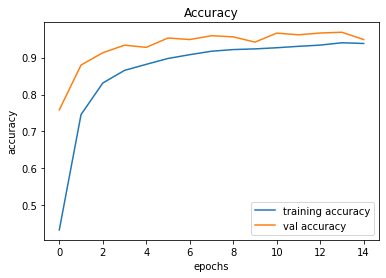

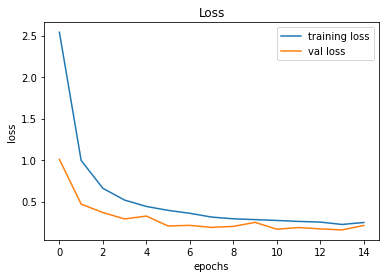

In [57]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(histry.history['accuracy'], label='training accuracy')
plt.plot(histry.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(histry.history['loss'], label='training loss')
plt.plot(histry.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Save model

In [ ]:
model.save('traffic_classifier.h5')

## Test model

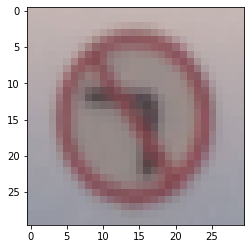

In [99]:
image = np.array(Image.open("test/PTSD_00030.jpg").resize((30, 30)))
plt.imshow(image)

In [100]:
image = image.reshape(1,30,30,3)
y_pred = model.predict(image)
np.argmax(y_pred,axis=1)

array([9])